# 計算及繪製多分類混淆矩陣

## 載入資料

In [1]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

## 計算混淆矩陣

In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## 繪製混淆矩陣

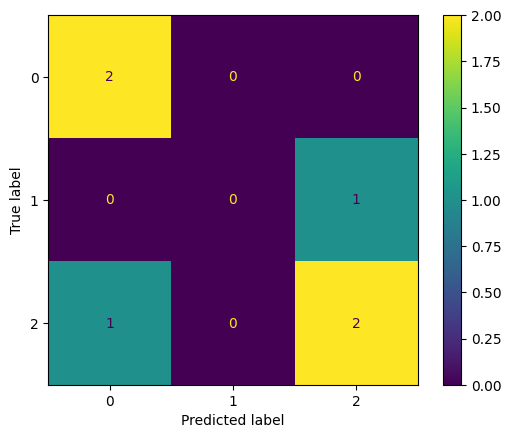

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

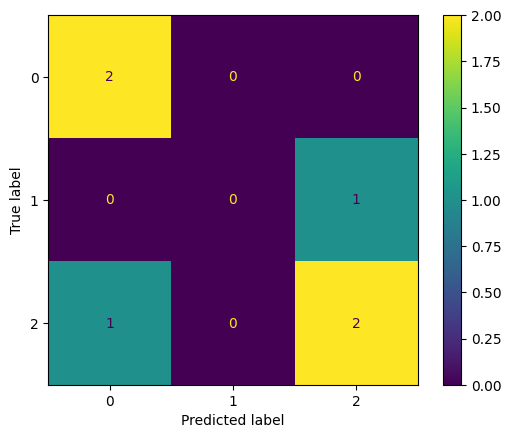

In [ ]:
# 方法 2
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

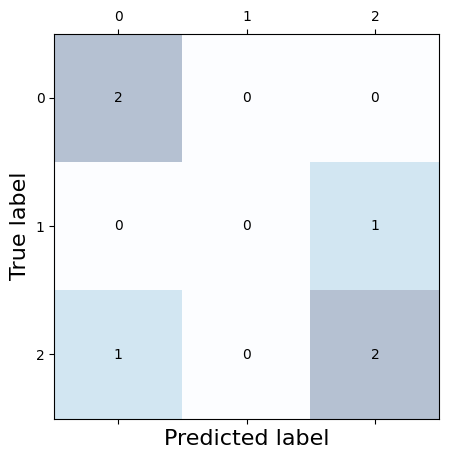

In [ ]:
# 方法 3
fig, ax = plt.subplots(figsize=(5, 5))

# 顯示矩陣
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

# 按 [1, 0] 順序
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

# 置換刻度        
# ax.set_xticks(range(cm.shape[0]), fontsize=14)
# ax.set_yticks(range(cm.shape[1]), fontsize=14)

# 設定標籤        
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)

## 繪製混淆矩陣

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
C:\Users\monic\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  func(

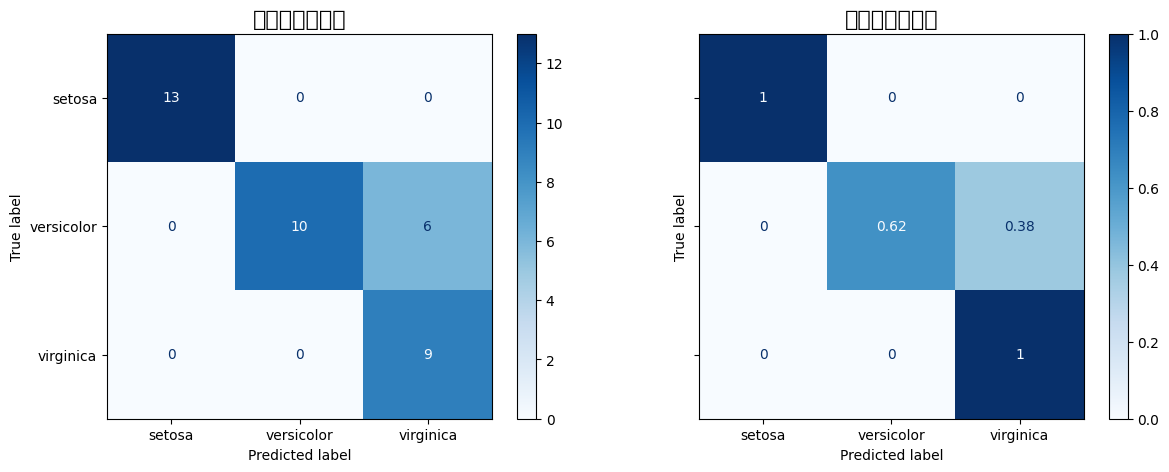

In [6]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# 載入資料
ds = datasets.load_iris()
X, y = ds.data, ds.target

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型訓練
clf = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

y_pred = clf.predict(X_test)

# 設定顯示小數點位數
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("正常的混淆矩陣", None),
                  ("正規化混淆矩陣", 'true')]

# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

f, axes = plt.subplots(1, 2, figsize=(14, 5), sharey='row')
for i, (title, normalize) in enumerate(titles_options):
    cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[i]
                            , cmap=plt.cm.Blues, display_labels=ds.target_names
                            , normalize=normalize)
#     cm.plot(ax=axes[i])
    cm.ax_.set_title(title, fontsize=16)